In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [10]:
tesla = yf.Ticker('TSLA')


In [11]:
tesla_data = tesla.history(period="max")

TSLA: No data found for this date range, symbol may be delisted


In [12]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [13]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [14]:
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
tesla_revenue= pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue=tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","")
tesla_revenue.head()

In [17]:
print(tesla_revenue.columns)


Index(['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1'], dtype='object')


In [18]:
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})


In [ ]:
tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'})
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue.head()


In [20]:
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})


In [22]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
print(tesla_revenue.head())


         Date  Revenue
0  2023-03-31  23329.0
1  2022-12-31  24318.0
2  2022-09-30  21454.0
3  2022-06-30  16934.0
4  2022-03-31  18756.0


In [23]:
tesla_revenue

,Date,Revenue
0,2023-03-31,23329.0
1,2022-12-31,24318.0
2,2022-09-30,21454.0
3,2022-06-30,16934.0
4,2022-03-31,18756.0
5,2021-12-31,17719.0
6,2021-09-30,13757.0
7,2021-06-30,11958.0
8,2021-03-31,10389.0
9,2020-12-31,10744.0


In [ ]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(int)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(int)
print(tesla_revenue.head())


In [ ]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(int)
print(tesla_revenue.head())


In [26]:
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float).astype('Int64')
print(tesla_revenue.head())


         Date  Revenue
0  2023-03-31    23329
1  2022-12-31    24318
2  2022-09-30    21454
3  2022-06-30    16934
4  2022-03-31    18756


In [27]:
tesla_revenue


,Date,Revenue
0,2023-03-31,23329
1,2022-12-31,24318
2,2022-09-30,21454
3,2022-06-30,16934
4,2022-03-31,18756
5,2021-12-31,17719
6,2021-09-30,13757
7,2021-06-30,11958
8,2021-03-31,10389
9,2020-12-31,10744


In [28]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
50,2010-09-30,31
51,2010-06-30,28
52,2010-03-31,21
54,2009-09-30,46
55,2009-06-30,27


In [29]:
gamestop = yf.Ticker("GME")

In [3]:
import yfinance as yf

gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")


GME: No data found for this date range, symbol may be delisted


In [4]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [6]:
import requests

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Further processing of the HTML data can be performed here


In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [8]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html5lib")


In [12]:
import pandas as pd

gme_revenue = pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)': 'Date', 'GameStop Quarterly Revenue (Millions of US $).1': 'Revenue'}, inplace=False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")


In [13]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


In [17]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\akash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.6/7.6 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 960.7 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Retrieve Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(int)

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Generate the graph
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')


In [ ]:
import requests
import pandas as pd

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a GET request to the URL and retrieve the HTML content
html_data = requests.get(url).text

# Use BeautifulSoup to parse the HTML data
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Find the table containing Tesla revenue data
tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]

# Rename the columns
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})

# Clean up the 'Revenue' column
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', ''), errors='coerce')

# Drop any rows with NaN values in the 'Revenue' column
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

# Convert 'Revenue' column to integer type
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(int)

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Example usage
tesla_data = tesla.history(period="max")
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')


TSLA: No data found for this date range, symbol may be delisted


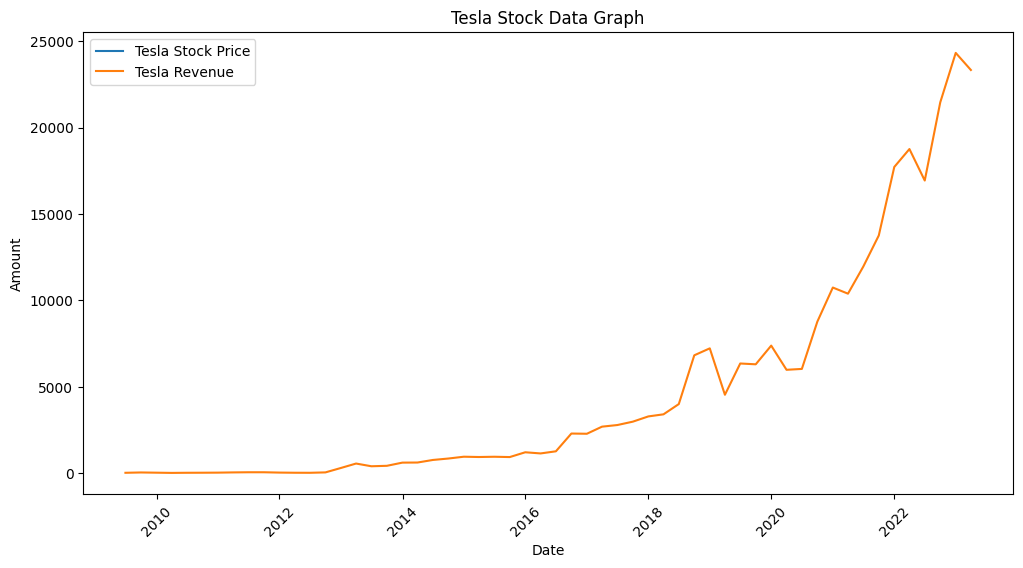

In [1]:
import yfinance as yf
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Define the URL for revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Retrieve HTML content
html_data = requests.get(url).text

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html5lib")

# Find the table containing Tesla revenue data
tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)': 'Date', 'Tesla Quarterly Revenue (Millions of US $).1': 'Revenue'})
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', ''), errors='coerce')
tesla_revenue.dropna(subset=['Revenue'], inplace=True)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Example usage
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')


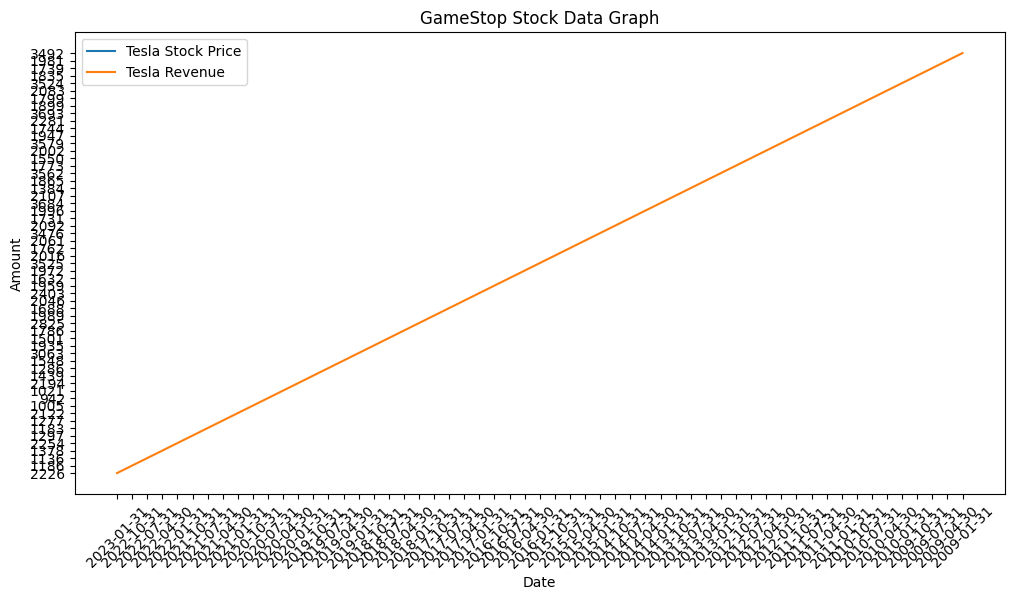

In [22]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')